<a href="https://colab.research.google.com/github/mochammadcholilurrokhman/PCVK_Ganjil_Mochammad-Cholilur-Rokhman/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb”

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

3.  Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png)

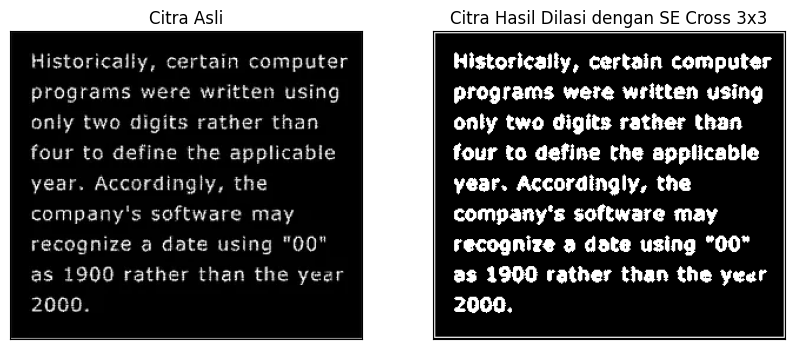

In [24]:
# Fungsi dilasi dengan SE cross 3x3
def dilasi_citra_cross(F):
    # Ukuran citra
    p, q = F.shape

    # Hasil citra dilasi dengan ukuran yang sama
    imgD = np.zeros((p, q), dtype=np.uint8)

    # Proses dilasi menggunakan SE cross 3x3
    for i in range(1, p - 1):
        for j in range(1, q - 1):
            # Mengambil piksel di pusat, atas, bawah, kiri, dan kanan
            cross_region = [
                F[i, j],     # pusat
                F[i - 1, j], # atas
                F[i + 1, j], # bawah
                F[i, j - 1], # kiri
                F[i, j + 1]  # kanan
            ]
            # Menentukan nilai maksimum di dalam cross region
            imgD[i, j] = max(cross_region)

    return imgD

# Membaca citra input dalam mode grayscale dan mengkonversinya ke citra biner
img = cv2.imread('/content/drive/MyDrive/PCVK/morphology.png', 0)
_, thresh = cv2.threshold(img, 125, 255, cv2.THRESH_BINARY)

# Melakukan operasi dilasi dengan SE cross 3x3
imgD = dilasi_citra_cross(thresh)

# Menampilkan citra asli dan hasil dilasi
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_d, cmap='gray')
plt.title('Citra Asli')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi dengan SE Cross 3x3')
plt.xticks([]), plt.yticks([])

plt.show()


4.  Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png, dan cetak Structuring Element-nya)

Structuring Element (SE) berbentuk Cross 3x3:
[[0 1 0]
 [1 1 1]
 [0 1 0]]


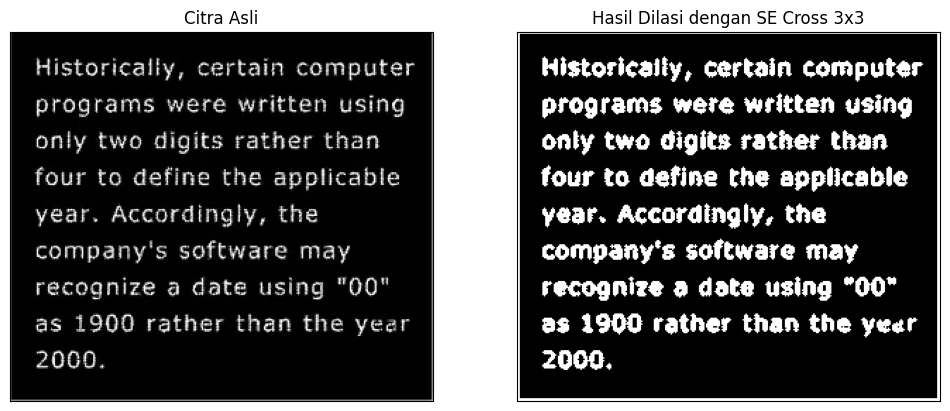

In [25]:
# Membaca citra input dalam mode grayscale
img = cv2.imread('/content/drive/MyDrive/PCVK/morphology.png', 0)

# Membuat threshold untuk mengubah citra menjadi biner
_, thresh = cv2.threshold(img, 125, 255, cv2.THRESH_BINARY)

# Mendefinisikan Structuring Element (SE) berbentuk cross 3x3
se_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

# Melakukan operasi dilasi dengan SE cross 3x3
imgD = cv2.dilate(thresh, se_cross)

# Mencetak Structuring Element
print("Structuring Element (SE) berbentuk Cross 3x3:")
print(se_cross)

# Menampilkan citra asli dan hasil dilasi
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_d, cmap='gray')
plt.title('Citra Asli')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(imgD, cmap='gray')
plt.title('Hasil Dilasi dengan SE Cross 3x3')
plt.xticks([]), plt.yticks([])

plt.show()


5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
j.png)

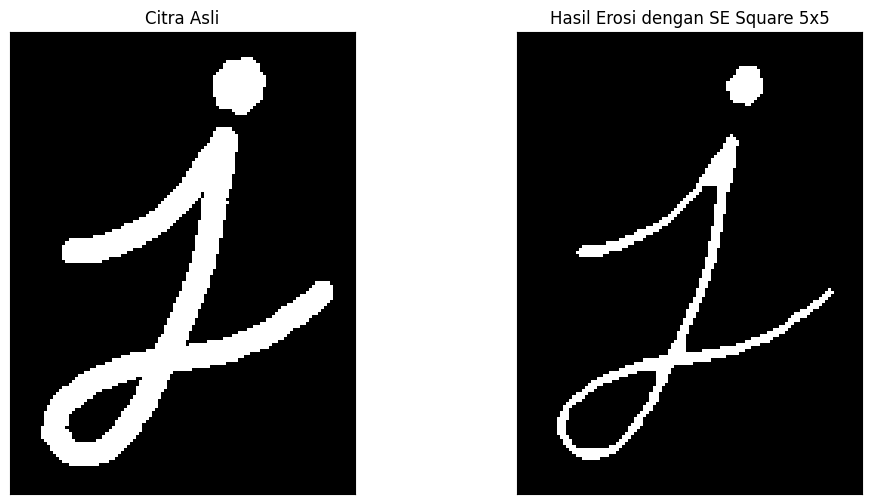

In [26]:
# Fungsi erosi dengan Structuring Element berbentuk square 5x5
def erosi_citra_square(F, w):
    # Ukuran citra
    p, q = F.shape

    # Membuat citra output dengan ukuran yang sama dan diisi dengan nol
    imgE = np.zeros((p, q), dtype=np.uint8)

    # Membuat Structuring Element square 5x5
    SE = np.ones((w, w), dtype=np.uint8)
    constant = (w - 1) // 2

    # Proses erosi
    for i in range(constant, p - constant):
        for j in range(constant, q - constant):
            # Mengambil region 5x5 di sekitar piksel yang diproses
            region = F[i - constant:i + constant + 1, j - constant:j + constant + 1]

            # Mengambil minimum dari hasil perkalian region dengan SE
            if np.array_equal(region, SE):
                imgE[i, j] = 1
            else:
                imgE[i, j] = 0

    return imgE

# Membaca citra input dalam mode grayscale dan mengkonversinya ke citra biner
img_erosi= cv2.imread('/content/drive/MyDrive/PCVK/j.png', 0)
_, thresh = cv2.threshold(img_erosi, 125, 1, cv2.THRESH_BINARY)

# Melakukan operasi erosi dengan SE square 5x5
w = 5
imgE = erosi_citra_square(thresh, w)

# Menampilkan citra asli dan hasil erosi
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_erosi, cmap='gray')
plt.title('Citra Asli')
plt.xticks([]), plt.yticks([])


plt.subplot(1, 2, 2)
plt.imshow(imgE, cmap='gray')
plt.title('Hasil Erosi dengan SE Square 5x5')
plt.xticks([]), plt.yticks([])

plt.show()

6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

Structuring Element (SE) berbentuk Square 5x5:
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


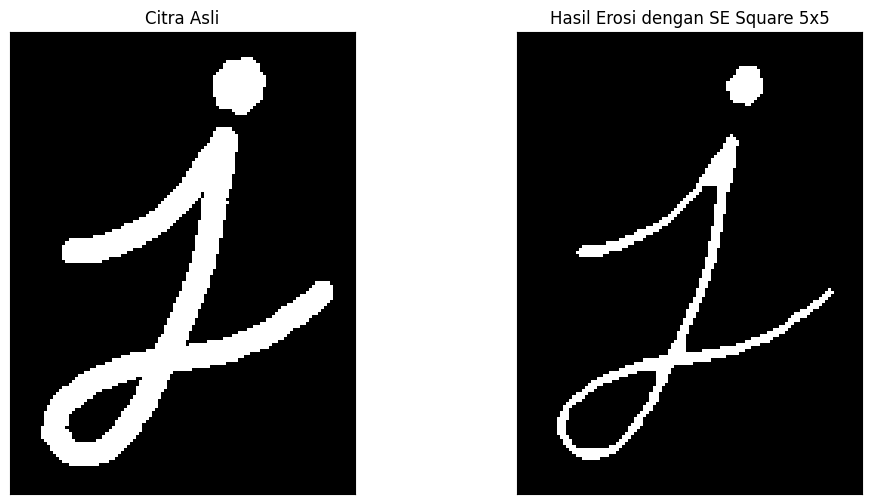

In [27]:
# Membaca citra input dalam mode grayscale
img_asli = cv2.imread('/content/drive/MyDrive/PCVK/j.png', 0)

# Membuat threshold untuk mengubah citra menjadi biner
_, thresh = cv2.threshold(img_asli, 125, 255, cv2.THRESH_BINARY)

# Mendefinisikan Structuring Element (SE) berbentuk square 5x5
se_square = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

# Melakukan operasi erosi dengan SE square 5x5
imgE = cv2.erode(thresh, se_square)

# Mencetak Structuring Element
print("Structuring Element (SE) berbentuk Square 5x5:")
print(se_square)

# Menampilkan citra asli dan hasil erosi
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_asli, cmap='gray')
plt.title('Citra Asli')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(imgE, cmap='gray')
plt.title('Hasil Erosi dengan SE Square 5x5')
plt.xticks([]), plt.yticks([])

plt.show()


7. Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)

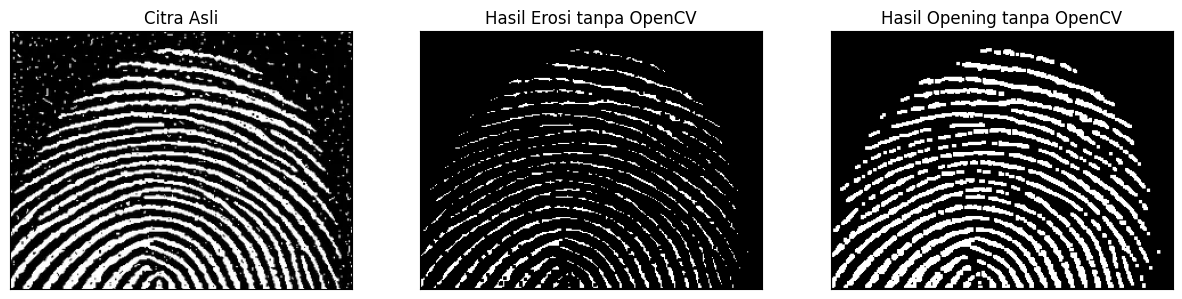

In [29]:
# Fungsi erosi
def erosi_citra_square(F, w):
    p, q = F.shape
    imgE = np.zeros((p, q), dtype=np.uint8)
    SE = np.ones((w, w), dtype=np.uint8)
    constant = (w - 1) // 2

    for i in range(constant, p - constant):
        for j in range(constant, q - constant):
            region = F[i - constant:i + constant + 1, j - constant:j + constant + 1]
            if np.all(region == SE):
                imgE[i, j] = 1
            else:
                imgE[i, j] = 0
    return imgE

# Fungsi dilasi
def dilasi_citra_square(F, w):
    p, q = F.shape
    imgD = np.zeros((p, q), dtype=np.uint8)
    SE = np.ones((w, w), dtype=np.uint8)
    constant = (w - 1) // 2

    for i in range(constant, p - constant):
        for j in range(constant, q - constant):
            region = F[i - constant:i + constant + 1, j - constant:j + constant + 1]
            if np.any(region == 1):
                imgD[i, j] = 1
    return imgD

# Fungsi opening (erosi kemudian dilasi)
def opening_citra_square(F, w):
    erosi_result = erosi_citra_square(F, w)
    dilasi_result = dilasi_citra_square(erosi_result, w)
    return erosi_result, dilasi_result

# Membaca citra dalam mode grayscale dan membuat citra biner
img = cv2.imread('/content/drive/MyDrive/PCVK/fingerprint.png', 0)
_, binary_img = cv2.threshold(img, 125, 1, cv2.THRESH_BINARY)

# Melakukan operasi opening dengan SE square 3x3
w = 3
erosi_result, img_opening = opening_citra_square(binary_img, w)

# Menampilkan hasil
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Citra Asli')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(erosi_result, cmap='gray')
plt.title('Hasil Erosi tanpa OpenCV')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(img_opening, cmap='gray')
plt.title('Hasil Opening tanpa OpenCV')
plt.xticks([]), plt.yticks([])

plt.show()

8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)

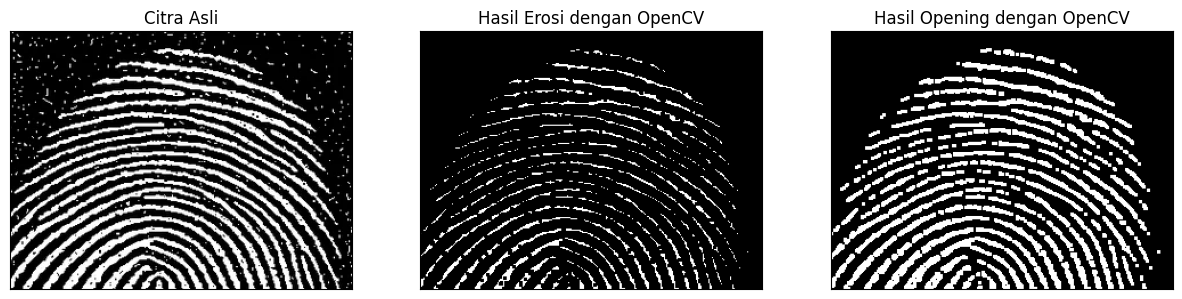

In [30]:
# Membaca citra input dalam mode grayscale
img = cv2.imread('/content/drive/MyDrive/PCVK/fingerprint.png', 0)

# Membuat threshold untuk mengubah citra menjadi biner
_, binary_img = cv2.threshold(img, 125, 255, cv2.THRESH_BINARY)

# Mendefinisikan Structuring Element berbentuk square 3x3
se_square = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Melakukan operasi erosi dengan SE square 3x3
erosi_result_cv = cv2.erode(binary_img, se_square)

# Melakukan operasi opening dengan SE square 3x3
img_opening_cv = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, se_square)

# Menampilkan hasil
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Citra Asli')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(erosi_result_cv, cmap='gray')
plt.title('Hasil Erosi dengan OpenCV')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(img_opening_cv, cmap='gray')
plt.title('Hasil Opening dengan OpenCV')
plt.xticks([]), plt.yticks([])

plt.show()


9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3  dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)

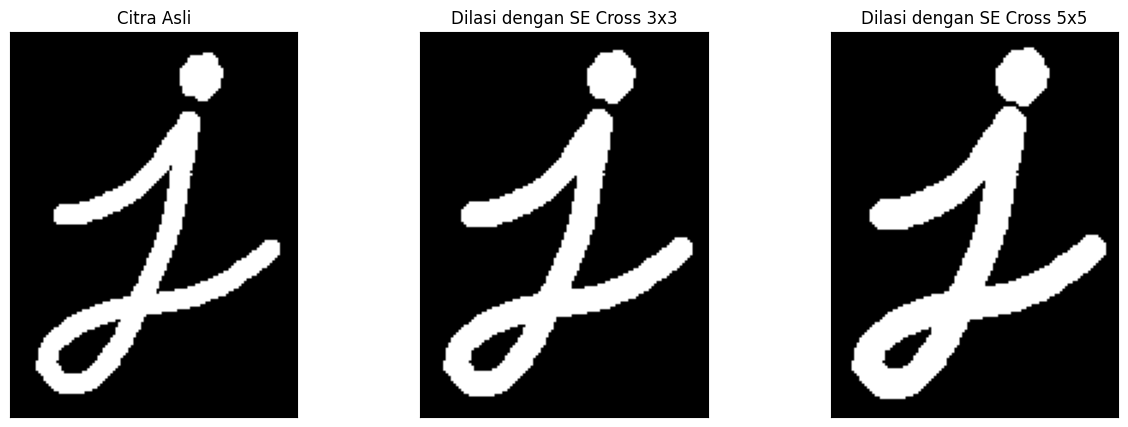

In [33]:
# Membaca citra dalam mode grayscale
img_cross = cv2.imread('/content/drive/MyDrive/PCVK/j.png', 0)

# Mengonversi citra ke biner
_, binary_img = cv2.threshold(img_cross, 125, 255, cv2.THRESH_BINARY)

# Mendefinisikan Structuring Element berbentuk cross 3x3 dan 5x5
se_cross_3x3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
se_cross_5x5 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

# Melakukan operasi dilasi dengan SE cross 3x3
dilasi_3x3 = cv2.dilate(binary_img, se_cross_3x3)

# Melakukan operasi dilasi dengan SE cross 5x5
dilasi_5x5 = cv2.dilate(binary_img, se_cross_5x5)

# Menampilkan hasil
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_cross, cmap='gray')
plt.title('Citra Asli')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(dilasi_3x3, cmap='gray')
plt.title('Dilasi dengan SE Cross 3x3')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(dilasi_5x5, cmap='gray')
plt.title('Dilasi dengan SE Cross 5x5')
plt.xticks([]), plt.yticks([])

plt.show()


10.  Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3  dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)

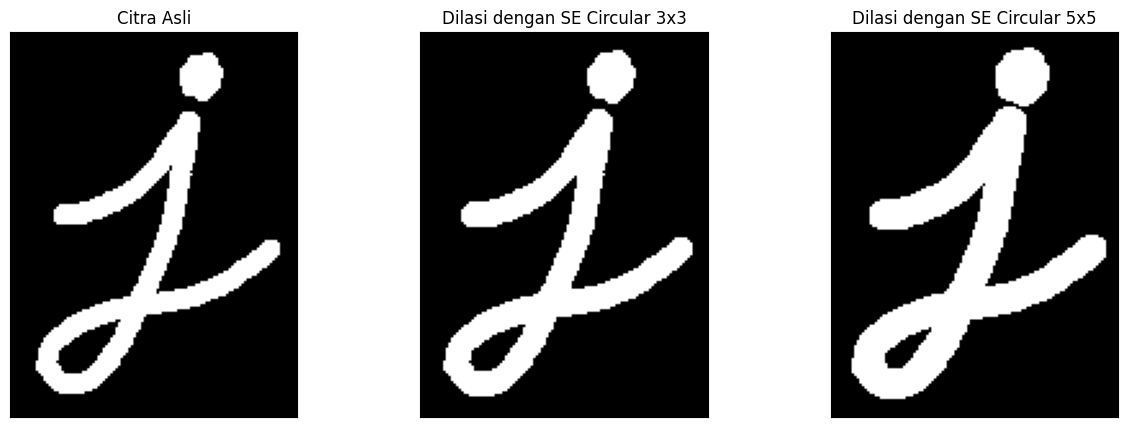

In [34]:
# Membaca citra dalam mode grayscale
img_circle = cv2.imread('/content/drive/MyDrive/PCVK/j.png', 0)

# Mengonversi citra ke biner
_, binary_img = cv2.threshold(img_circle, 125, 255, cv2.THRESH_BINARY)

# Mendefinisikan Structuring Element berbentuk circular 3x3 dan 5x5
se_circular_3x3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
se_circular_5x5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Melakukan operasi dilasi dengan SE circular 3x3
dilasi_3x3 = cv2.dilate(binary_img, se_circular_3x3)

# Melakukan operasi dilasi dengan SE circular 5x5
dilasi_5x5 = cv2.dilate(binary_img, se_circular_5x5)

# Menampilkan hasil
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_circle, cmap='gray')
plt.title('Citra Asli')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(dilasi_3x3, cmap='gray')
plt.title('Dilasi dengan SE Circular 3x3')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(dilasi_5x5, cmap='gray')
plt.title('Dilasi dengan SE Circular 5x5')
plt.xticks([]), plt.yticks([])

plt.show()


11.  Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5  dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)

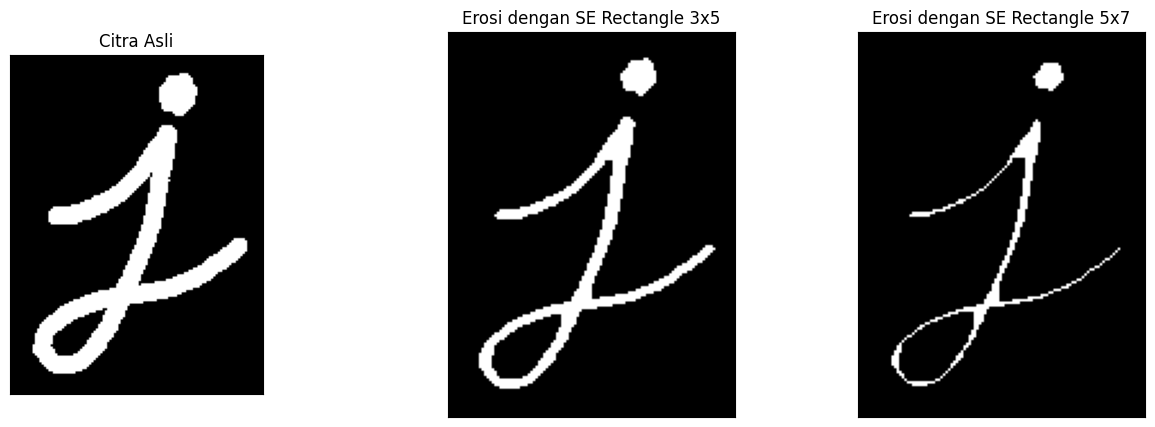

In [35]:
# Membaca citra dalam mode grayscale
img_rectangle = cv2.imread('/content/drive/MyDrive/PCVK/j.png', 0)

# Mengonversi citra ke biner
_, binary_img = cv2.threshold(img_rectangle, 125, 255, cv2.THRESH_BINARY)

# Mendefinisikan Structuring Element berbentuk rectangle 3x5 dan 5x7
se_rectangle_3x5 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 5))
se_rectangle_5x7 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 7))

# Melakukan operasi erosi dengan SE rectangle 3x5
erosi_3x5 = cv2.erode(binary_img, se_rectangle_3x5)

# Melakukan operasi erosi dengan SE rectangle 5x7
erosi_5x7 = cv2.erode(binary_img, se_rectangle_5x7)

# Menampilkan hasil
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(img_rectangle, cmap='gray')
plt.title('Citra Asli')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(erosi_3x5, cmap='gray')
plt.title('Erosi dengan SE Rectangle 3x5')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(erosi_5x7, cmap='gray')
plt.title('Erosi dengan SE Rectangle 5x7')
plt.xticks([]), plt.yticks([])

plt.show()


12. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)

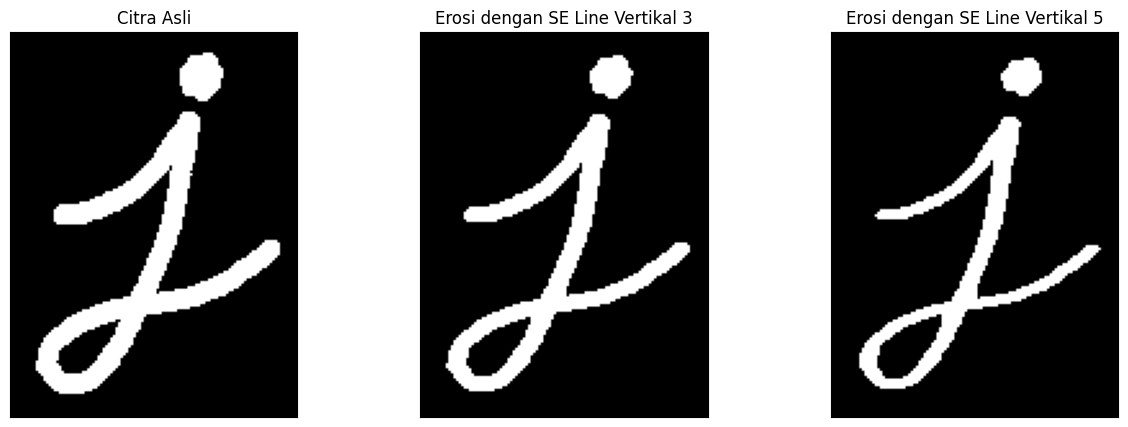

In [37]:
# Membaca citra dalam mode grayscale
img_line = cv2.imread('/content/drive/MyDrive/PCVK/j.png', 0)

# Mengonversi citra ke biner
_, binary_img = cv2.threshold(img_line, 125, 255, cv2.THRESH_BINARY)

# Buat structuring element
kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 3))
kernel5 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 5))

# Erosi
erosion3 = cv2.erode(img, kernel3, iterations=1)
erosion5 = cv2.erode(img, kernel5, iterations=1)

# Menampilkan hasil
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_line, cmap='gray')
plt.title('Citra Asli')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(erosion3, cmap='gray')
plt.title('Erosi dengan SE Line Vertikal 3')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(erosion5, cmap='gray')
plt.title('Erosi dengan SE Line Vertikal 5')
plt.xticks([]), plt.yticks([])

plt.show()